In [ ]:
pip install yfinance tensorflow statsmodels scikit-learn matplotlib

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

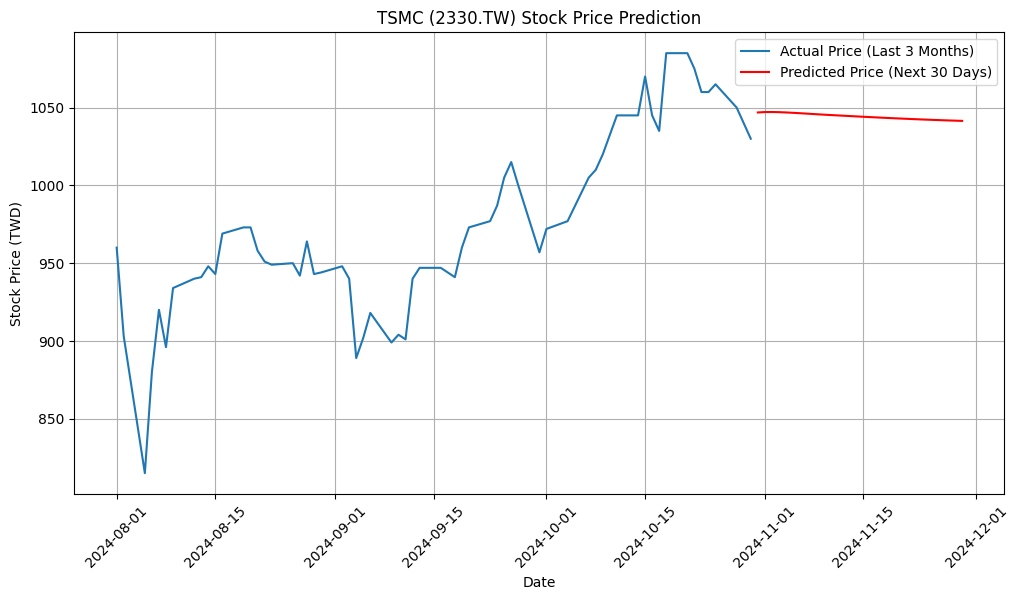

In [ ]:
# 導入所需的模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

# 獲取台積電的歷史股價資料（過去3個月）
ticker = "2330.TW"
data = yf.download(ticker, start="2024-08-01", end="2024-11-01")  # 過去3個月

# 使用收盤價
df = data[['Close']].copy()

# 正規化數據
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 建立訓練資料
window_size = 30  # 設定窗口大小為30天
X_train, y_train = [], []
for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 建構LSTM模型
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# 預測未來30天的價格
predicted_prices = []
current_input = scaled_data[-window_size:]  # 使用最近的30天資料
for _ in range(30):  # 預測30天
    X_test = np.reshape(current_input, (1, current_input.shape[0], 1))
    predicted_price_scaled = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    predicted_prices.append(predicted_price[0][0])

    # 更新輸入資料，將最新預測結果添加到輸入序列
    current_input = np.append(current_input, predicted_price_scaled)  # 添加預測價格
    current_input = current_input[1:]  # 移除最舊的數據點

# 繪製圖表
future_dates = [df.index[-1] + timedelta(days=i) for i in range(1, 31)]
predicted_prices = np.array(predicted_prices)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Price (Last 3 Months)')
plt.plot(future_dates, predicted_prices, label='Predicted Price (Next 30 Days)', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price (TWD)')
plt.title('TSMC (2330.TW) Stock Price Prediction')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

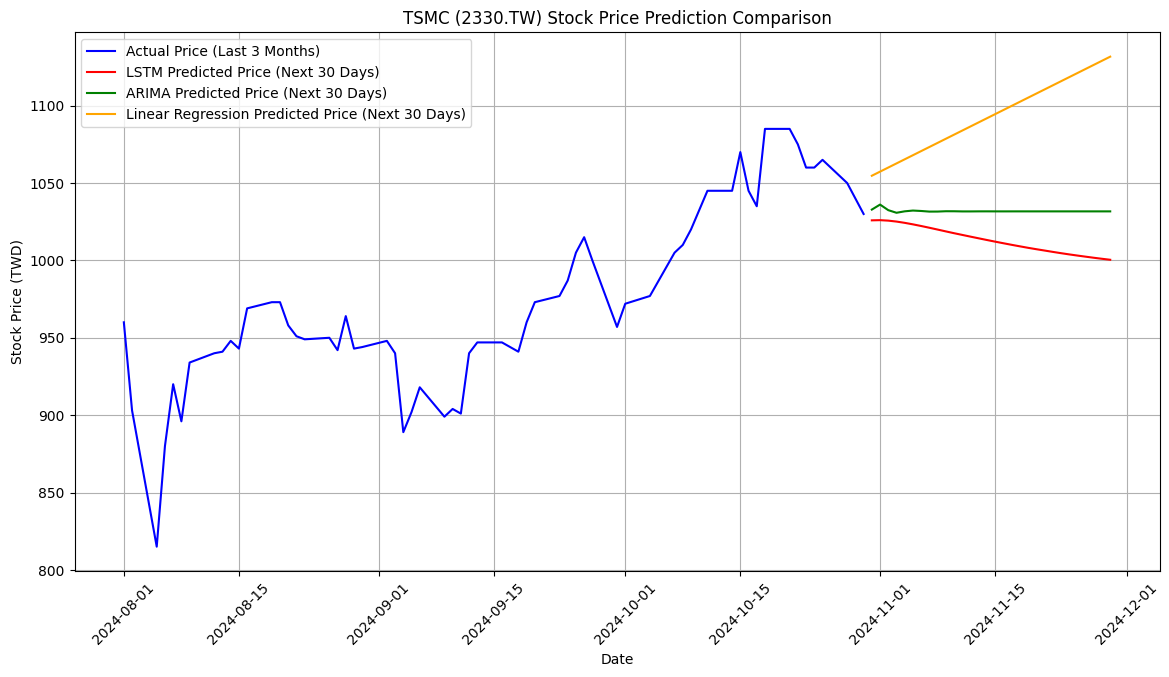

In [ ]:
# 導入所需的模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from sklearn.metrics import mean_squared_error

# 獲取台積電的歷史股價資料（過去3個月）
ticker = "2330.TW"
data = yf.download(ticker, start="2024-08-01", end="2024-11-01")  # 過去3個月

# 使用收盤價
df = data[['Close']].copy()

# LSTM模型的預測
# 正規化數據
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 建立LSTM模型的訓練資料
window_size = 30
X_train, y_train = [], []
for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 建構LSTM模型
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# 使用LSTM預測未來30天的價格
predicted_prices_lstm = []
current_input = scaled_data[-window_size:]
for _ in range(30):
    X_test = np.reshape(current_input, (1, current_input.shape[0], 1))
    predicted_price_scaled = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    predicted_prices_lstm.append(predicted_price[0][0])

    current_input = np.append(current_input, predicted_price_scaled)
    current_input = current_input[1:]

# ARIMA模型的預測
# 建立ARIMA模型
arima_model = ARIMA(df['Close'], order=(5, 1, 0))  # 設定ARIMA模型的參數
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=30)  # 預測未來30天

# 線性回歸模型的預測
# 準備線性回歸資料
df['Date'] = pd.date_range(start="2024-09-02", end="2024-11-01")  # 新增日期欄位
df['Date'] = (df['Date'] - df['Date'].min()).dt.days  # 將日期轉為天數
X = df[['Date']].values  # 特徵變數
y = df['Close'].values  # 目標變數

# 訓練線性回歸模型
linear_model = LinearRegression()
linear_model.fit(X, y)

# 預測未來30天的線性回歸結果
future_dates = np.array([(df['Date'].max() + i) for i in range(1, 31)]).reshape(-1, 1)
predicted_prices_lr = linear_model.predict(future_dates)

# 繪製圖表
future_dates_index = [df.index[-1] + timedelta(days=i) for i in range(1, 31)]

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Price (Last 3 Months)', color='blue')
plt.plot(future_dates_index, predicted_prices_lstm, label='LSTM Predicted Price (Next 30 Days)', color='red')
plt.plot(future_dates_index, arima_forecast, label='ARIMA Predicted Price (Next 30 Days)', color='green')
plt.plot(future_dates_index, predicted_prices_lr, label='Linear Regression Predicted Price (Next 30 Days)', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price (TWD)')
plt.title('TSMC (2330.TW) Stock Price Prediction Comparison')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

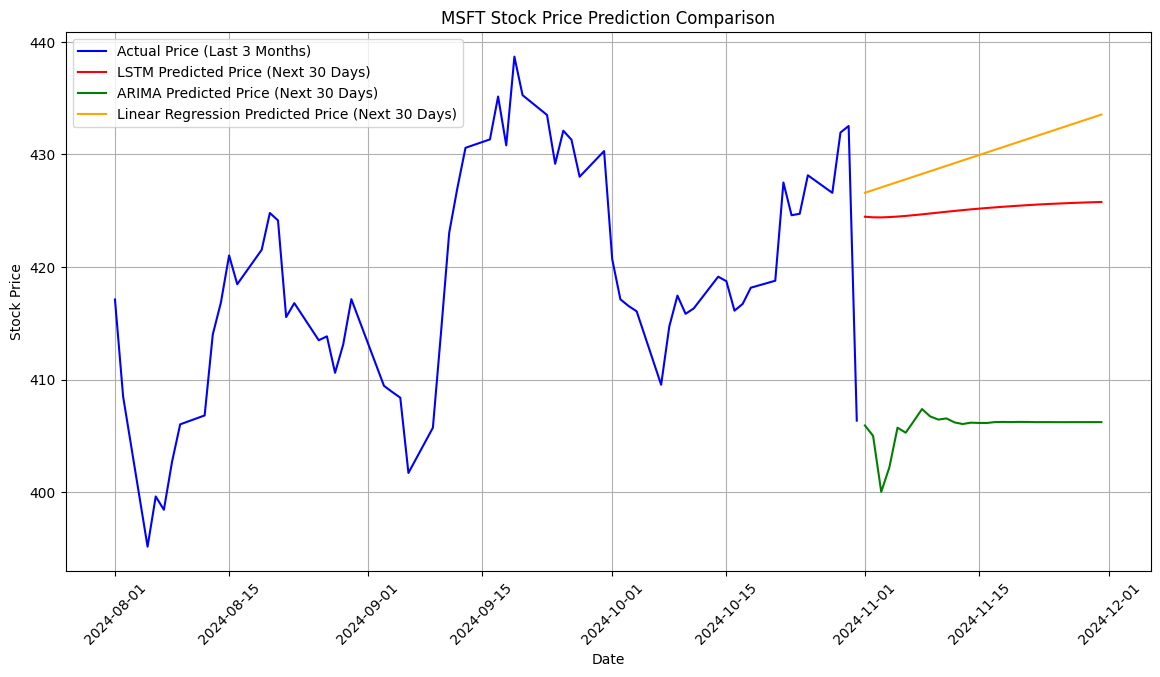

In [ ]:
# 導入所需的模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from sklearn.metrics import mean_squared_error

# 獲取台積電的歷史股價資料（過去3個月）
ticker = "MSFT"
data = yf.download(ticker, start="2024-08-01", end="2024-11-01")  # 過去3個月

# 使用收盤價
df = data[['Close']].copy()

# LSTM模型的預測
# 正規化數據
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 建立LSTM模型的訓練資料
window_size = 30
X_train, y_train = [], []
for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 建構LSTM模型
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# 使用LSTM預測未來30天的價格
predicted_prices_lstm = []
current_input = scaled_data[-window_size:]
for _ in range(30):
    X_test = np.reshape(current_input, (1, current_input.shape[0], 1))
    predicted_price_scaled = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    predicted_prices_lstm.append(predicted_price[0][0])

    current_input = np.append(current_input, predicted_price_scaled)
    current_input = current_input[1:]

# ARIMA模型的預測
# 建立ARIMA模型
arima_model = ARIMA(df['Close'], order=(5, 1, 0))  # 設定ARIMA模型的參數
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=30)  # 預測未來30天

# 線性回歸模型的預測
# 準備線性回歸資料
df['Date'] = pd.date_range(start="2024-08-29", end="2024-11-01")  # 新增日期欄位
df['Date'] = (df['Date'] - df['Date'].min()).dt.days  # 將日期轉為天數
X = df[['Date']].values  # 特徵變數
y = df['Close'].values  # 目標變數

# 訓練線性回歸模型
linear_model = LinearRegression()
linear_model.fit(X, y)

# 預測未來30天的線性回歸結果
future_dates = np.array([(df['Date'].max() + i) for i in range(1, 31)]).reshape(-1, 1)
predicted_prices_lr = linear_model.predict(future_dates)

# 繪製圖表
future_dates_index = [df.index[-1] + timedelta(days=i) for i in range(1, 31)]

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Price (Last 3 Months)', color='blue')
plt.plot(future_dates_index, predicted_prices_lstm, label='LSTM Predicted Price (Next 30 Days)', color='red')
plt.plot(future_dates_index, arima_forecast, label='ARIMA Predicted Price (Next 30 Days)', color='green')
plt.plot(future_dates_index, predicted_prices_lr, label='Linear Regression Predicted Price (Next 30 Days)', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('MSFT Stock Price Prediction Comparison')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

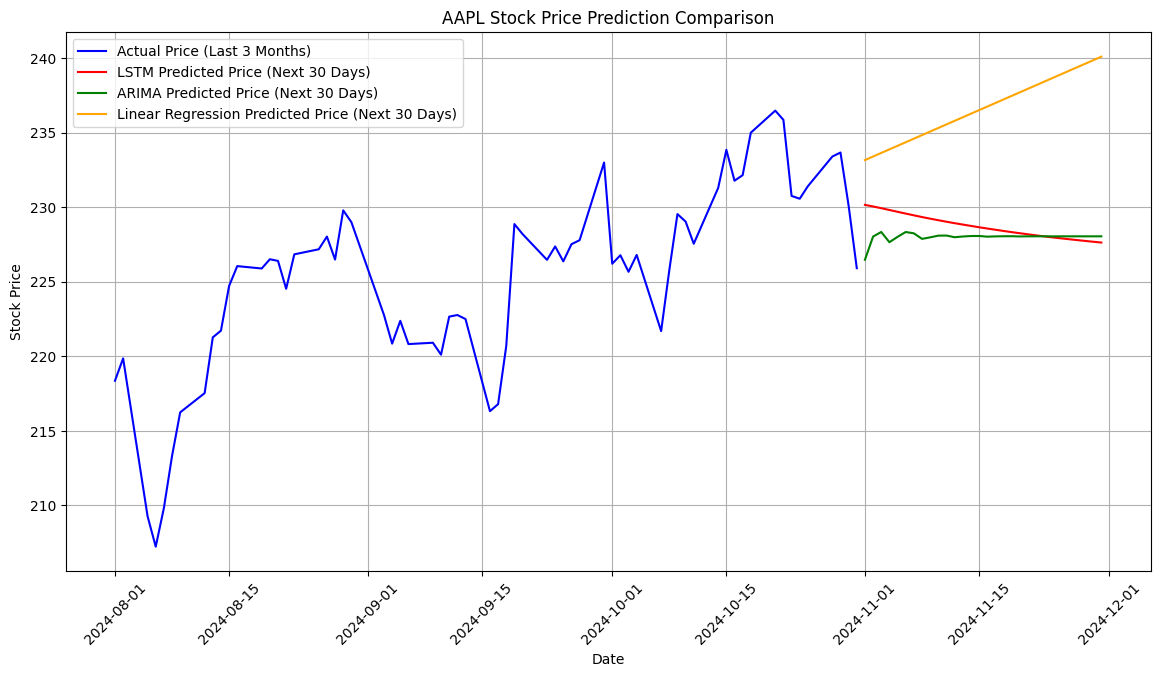

In [ ]:
# 導入所需的模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from sklearn.metrics import mean_squared_error

# 獲取台積電的歷史股價資料（過去3個月）
ticker = "AAPL"
data = yf.download(ticker, start="2024-08-01", end="2024-11-01")  # 過去3個月

# 使用收盤價
df = data[['Close']].copy()

# LSTM模型的預測
# 正規化數據
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 建立LSTM模型的訓練資料
window_size = 30
X_train, y_train = [], []
for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 建構LSTM模型
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# 使用LSTM預測未來30天的價格
predicted_prices_lstm = []
current_input = scaled_data[-window_size:]
for _ in range(30):
    X_test = np.reshape(current_input, (1, current_input.shape[0], 1))
    predicted_price_scaled = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    predicted_prices_lstm.append(predicted_price[0][0])

    current_input = np.append(current_input, predicted_price_scaled)
    current_input = current_input[1:]

# ARIMA模型的預測
# 建立ARIMA模型
arima_model = ARIMA(df['Close'], order=(5, 1, 0))  # 設定ARIMA模型的參數
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=30)  # 預測未來30天

# 線性回歸模型的預測
# 準備線性回歸資料
df['Date'] = pd.date_range(start="2024-08-29", end="2024-11-01")  # 新增日期欄位
df['Date'] = (df['Date'] - df['Date'].min()).dt.days  # 將日期轉為天數
X = df[['Date']].values  # 特徵變數
y = df['Close'].values  # 目標變數

# 訓練線性回歸模型
linear_model = LinearRegression()
linear_model.fit(X, y)

# 預測未來30天的線性回歸結果
future_dates = np.array([(df['Date'].max() + i) for i in range(1, 31)]).reshape(-1, 1)
predicted_prices_lr = linear_model.predict(future_dates)

# 繪製圖表
future_dates_index = [df.index[-1] + timedelta(days=i) for i in range(1, 31)]

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Price (Last 3 Months)', color='blue')
plt.plot(future_dates_index, predicted_prices_lstm, label='LSTM Predicted Price (Next 30 Days)', color='red')
plt.plot(future_dates_index, arima_forecast, label='ARIMA Predicted Price (Next 30 Days)', color='green')
plt.plot(future_dates_index, predicted_prices_lr, label='Linear Regression Predicted Price (Next 30 Days)', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('AAPL Stock Price Prediction Comparison')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

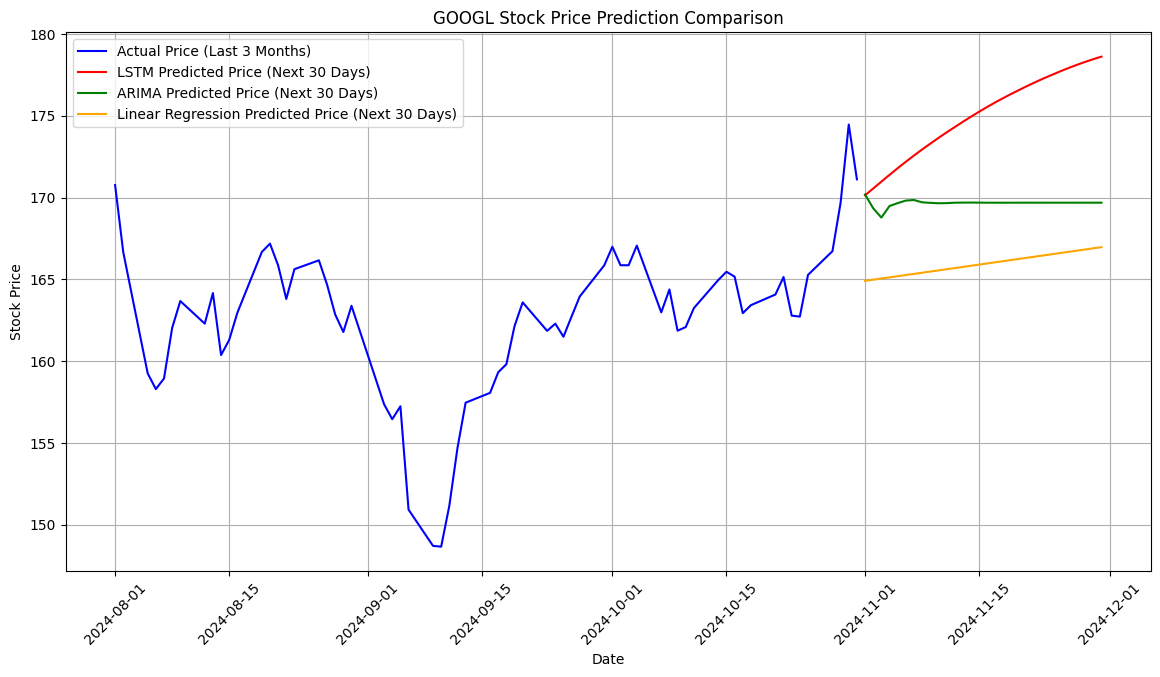

In [ ]:
# 導入所需的模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from sklearn.metrics import mean_squared_error

# 獲取台積電的歷史股價資料（過去3個月）
ticker = "GOOGL"
data = yf.download(ticker, start="2024-08-01", end="2024-11-01")  # 過去3個月

# 使用收盤價
df = data[['Close']].copy()

# LSTM模型的預測
# 正規化數據
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 建立LSTM模型的訓練資料
window_size = 30
X_train, y_train = [], []
for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 建構LSTM模型
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# 使用LSTM預測未來30天的價格
predicted_prices_lstm = []
current_input = scaled_data[-window_size:]
for _ in range(30):
    X_test = np.reshape(current_input, (1, current_input.shape[0], 1))
    predicted_price_scaled = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    predicted_prices_lstm.append(predicted_price[0][0])

    current_input = np.append(current_input, predicted_price_scaled)
    current_input = current_input[1:]

# ARIMA模型的預測
# 建立ARIMA模型
arima_model = ARIMA(df['Close'], order=(5, 1, 0))  # 設定ARIMA模型的參數
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=30)  # 預測未來30天

# 線性回歸模型的預測
# 準備線性回歸資料
df['Date'] = pd.date_range(start="2024-08-29", end="2024-11-01")  # 新增日期欄位
df['Date'] = (df['Date'] - df['Date'].min()).dt.days  # 將日期轉為天數
X = df[['Date']].values  # 特徵變數
y = df['Close'].values  # 目標變數

# 訓練線性回歸模型
linear_model = LinearRegression()
linear_model.fit(X, y)

# 預測未來30天的線性回歸結果
future_dates = np.array([(df['Date'].max() + i) for i in range(1, 31)]).reshape(-1, 1)
predicted_prices_lr = linear_model.predict(future_dates)

# 繪製圖表
future_dates_index = [df.index[-1] + timedelta(days=i) for i in range(1, 31)]

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Price (Last 3 Months)', color='blue')
plt.plot(future_dates_index, predicted_prices_lstm, label='LSTM Predicted Price (Next 30 Days)', color='red')
plt.plot(future_dates_index, arima_forecast, label='ARIMA Predicted Price (Next 30 Days)', color='green')
plt.plot(future_dates_index, predicted_prices_lr, label='Linear Regression Predicted Price (Next 30 Days)', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('GOOGL Stock Price Prediction Comparison')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

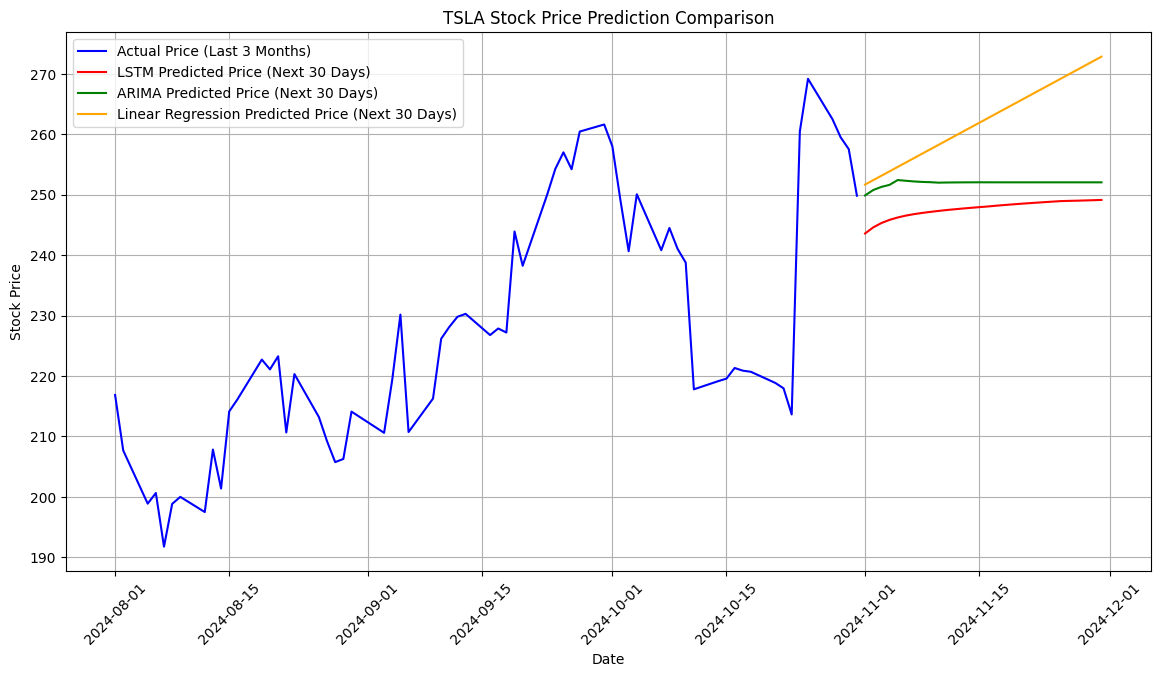

In [ ]:
# 導入所需的模組
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from sklearn.metrics import mean_squared_error

# 獲取台積電的歷史股價資料（過去3個月）
ticker = "TSLA"
data = yf.download(ticker, start="2024-08-01", end="2024-11-01")  # 過去3個月

# 使用收盤價
df = data[['Close']].copy()

# LSTM模型的預測
# 正規化數據
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 建立LSTM模型的訓練資料
window_size = 30
X_train, y_train = [], []
for i in range(window_size, len(scaled_data)):
    X_train.append(scaled_data[i-window_size:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 建構LSTM模型
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

# 使用LSTM預測未來30天的價格
predicted_prices_lstm = []
current_input = scaled_data[-window_size:]
for _ in range(30):
    X_test = np.reshape(current_input, (1, current_input.shape[0], 1))
    predicted_price_scaled = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    predicted_prices_lstm.append(predicted_price[0][0])

    current_input = np.append(current_input, predicted_price_scaled)
    current_input = current_input[1:]

# ARIMA模型的預測
# 建立ARIMA模型
arima_model = ARIMA(df['Close'], order=(5, 1, 0))  # 設定ARIMA模型的參數
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=30)  # 預測未來30天

# 線性回歸模型的預測
# 準備線性回歸資料
df['Date'] = pd.date_range(start="2024-08-29", end="2024-11-01")  # 新增日期欄位
df['Date'] = (df['Date'] - df['Date'].min()).dt.days  # 將日期轉為天數
X = df[['Date']].values  # 特徵變數
y = df['Close'].values  # 目標變數

# 訓練線性回歸模型
linear_model = LinearRegression()
linear_model.fit(X, y)

# 預測未來30天的線性回歸結果
future_dates = np.array([(df['Date'].max() + i) for i in range(1, 31)]).reshape(-1, 1)
predicted_prices_lr = linear_model.predict(future_dates)

# 繪製圖表
future_dates_index = [df.index[-1] + timedelta(days=i) for i in range(1, 31)]

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Price (Last 3 Months)', color='blue')
plt.plot(future_dates_index, predicted_prices_lstm, label='LSTM Predicted Price (Next 30 Days)', color='red')
plt.plot(future_dates_index, arima_forecast, label='ARIMA Predicted Price (Next 30 Days)', color='green')
plt.plot(future_dates_index, predicted_prices_lr, label='Linear Regression Predicted Price (Next 30 Days)', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TSLA Stock Price Prediction Comparison')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
